In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt

In [2]:
lit_rates_survey = pd.read_csv("/kaggle/input/literacy-rates-india-top-bottom-3-201718-survey/LiteracyRatesIndia_NSSOSurvey.csv")

In [3]:
state_keys = pd.read_csv("/kaggle/input/literacy-rates-with-year-state-codes/literacy_rates_2016.csv")[["state_code","state_name"]]
lit_rates_survey = pd.merge(lit_rates_survey, state_keys, left_on="State", right_on="state_name").drop("state_name", axis="columns")

In [4]:
state_codes = lit_rates_survey.sort_values(by="state_code")["state_code"].values

In [5]:
total_case_counts = pd.read_csv("/kaggle/input/casestypes/total_case_counts_16_18.csv")

# The Relationship between Literacy Rate vs Crime Rate Analysis

It is not unwise to expect that greater the literacy rate of a state, the less the crime there would be. Though crime
has more to do with psychological factors, a negative relationship can be expected in literacy rate and crime
rate.

This analysis aims to evaluate this correlation for selected states of India, with varying rates of literacy.

## Literacy Rates
The Literacy Rates used here are from the NSSO Government Survey of 2017-18, and the data is shown below

In [6]:
lit_rates_survey.sort_values(by="Overall", ascending=False)

,State,Male,Female,Overall,state_code
0,Kerala,97.4,95.2,96.2,4
1,Delhi,93.7,82.4,88.7,26
2,Uttarakhand,94.3,80.7,87.6,15
9,Himachal Pradesh,92.9,80.5,86.6,5
6,Assam,90.1,81.2,85.9,6
13,Maharashtra,90.7,78.4,84.8,1
14,Punjab,88.5,78.5,83.7,22
16,Tamil Nadu,87.9,77.9,82.9,10
7,Gujarat,89.5,74.8,82.4,17
18,West Bengal,84.8,76.1,80.5,16


## The Analysis

We will analyse whether literacy rates affect the rates of different types of crimes in the above states, by analysing the number of court cases being fought under the respective acts that cover these types of crimes. We will be taking a look at court cases from 2016 to 2018.

The different crime types and the respective acts are listed as follows:
1. Crimes agianst Women:
    - Domestic Violence Act, 2005
    - Dowry Prohibition Act
    - Immoral Traffic Prevention Act
2. Crimes against Children
    - Juvenile Justice (Care and Protection of Children) Act
    - Protection of Children From Sexual Offences Act
    - Child Labor Act 1986
    - Prohibition of Child Marriage Act
3. Cyber Crimes
    - Information Technology Act, 2000
4. Crimes related to Arms
    - Arms Act
5. Overall Criminal Cases
    - Criminal Cases under IPC

## Crimes Against Women

In [7]:
women_cases = pd.read_csv("/kaggle/input/casestypes/Archive 2/women_cases-2016-18.csv")
women_cases.drop(["Unnamed: 0", "Unnamed: 0.1"], axis="columns", inplace=True)

In [8]:
case_counts = women_cases.groupby(by="state_code").count()

In [9]:
req_df = pd.merge(lit_rates_survey, case_counts["ddl_case_id"], on="state_code")
req_df = pd.merge(req_df, total_case_counts, on="state_code").sort_values(by="Overall")

req_df["%age cases"] = (req_df["ddl_case_id"] / req_df["Total"])*100
req_df

,State,Male,Female,Overall,state_code,ddl_case_id,Total,%age cases
5,Andhra Pradesh,73.4,59.5,66.4,2,114,900345,0.012662
13,Rajasthan,80.8,57.6,69.7,9,15816,2338081,0.676452
4,Bihar,79.7,60.5,70.9,8,838,1480985,0.056584
3,Telangana,80.5,65.1,72.8,29,1278,669297,0.190947
15,Uttar Pradesh,81.8,63.4,73.0,13,29175,7018929,0.415662
9,Jharkhand,83.0,64.7,74.3,7,475,581871,0.081633
10,Karnataka,83.4,70.5,77.2,3,3622,3276183,0.110555
7,Haryana,88.0,71.3,80.4,14,16080,1807699,0.889529
16,West Bengal,84.8,76.1,80.5,16,13443,1271153,1.057544
14,Tamil Nadu,87.9,77.9,82.9,10,725,1788571,0.040535


<AxesSubplot:>

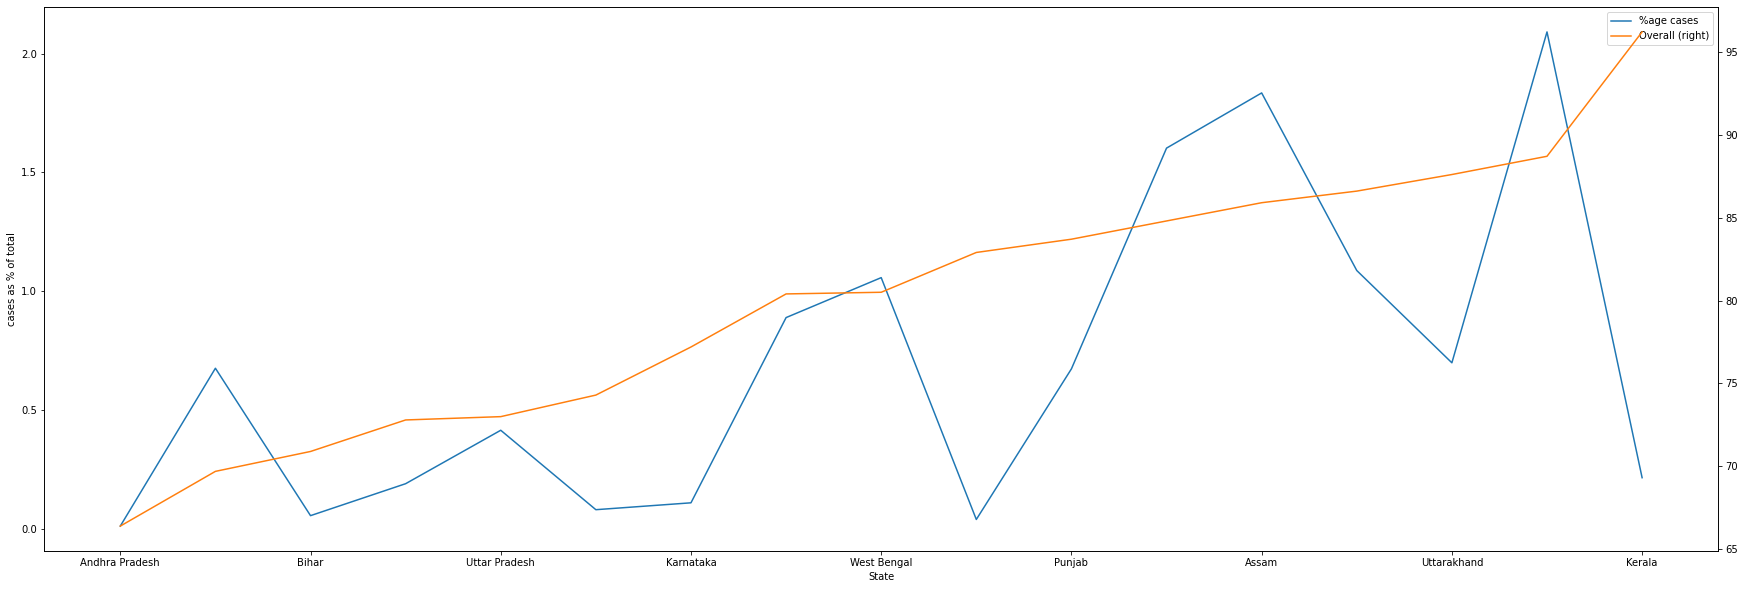

In [10]:
fig, ax = plt.subplots(figsize=(30,10))

req_df.plot(x="State", y="%age cases", ylabel = "cases as % of total", ax=ax)
req_df.plot(x="State",y="Overall",ax=ax, secondary_y=True)

As we can see, there is an upward trend to be observed between literacy rates and the number of cases under the Domestic Violence Act as a percentage of the total number of cases registered per state. Also, there are a few interesting insights:

Although this percentage is very low in the most literate state of India, Kerala, with 0.21%, the state of Delhi, which is the 2nd most literate state of India, has the highest percentage of Domestic Violence cases heard in its courts during this timeframe at 2.09%. This data backs up the claim of Delhi being the most unsafe state for women in India.

Surprisingly, the least literate states perform much better, with Andhra Pradesh and Bihar quoting 0.01% and 0.05% of cases respectively. And in general, the lesser literate states showed a lesser percentage of cases registered under Domestic Violence

On the other hand, these low percentages in the lesser literate states of India could also point to the fact that a lack of formal education may deter the common woman from approaching the judicial system. As we can infer from the graph, on an average, the lesser literate states also enjoy a lesser percentage of Domestic Violence cases.

# Crimes under Child Protection Acts

In [11]:
child_cases = pd.read_csv("/kaggle/input/casestypes/Archive 2/child_cases-2016-18.csv")
child_cases.drop(["Unnamed: 0", "Unnamed: 0.1"], axis="columns", inplace=True)
case_counts = child_cases.groupby(by="state_code").count()

In [12]:
req_df = pd.merge(lit_rates_survey, case_counts["ddl_case_id"], on="state_code")
req_df = pd.merge(req_df, total_case_counts, on="state_code").sort_values(by="Overall")

req_df["%age cases"] = (req_df["ddl_case_id"] / req_df["Total"])*100
req_df

,State,Male,Female,Overall,state_code,ddl_case_id,Total,%age cases
5,Andhra Pradesh,73.4,59.5,66.4,2,1066,900345,0.118399
15,Rajasthan,80.8,57.6,69.7,9,2798,2338081,0.119671
4,Bihar,79.7,60.5,70.9,8,140,1480985,0.009453
3,Telangana,80.5,65.1,72.8,29,236,669297,0.035261
16,Uttar Pradesh,81.8,63.4,73.0,13,7871,7018929,0.112140
12,Madhya Pradesh,81.2,65.5,73.7,23,1406,2372692,0.059258
10,Jharkhand,83.0,64.7,74.3,7,1126,581871,0.193514
11,Karnataka,83.4,70.5,77.2,3,73,3276183,0.002228
8,Haryana,88.0,71.3,80.4,14,1676,1807699,0.092715
17,West Bengal,84.8,76.1,80.5,16,1022,1271153,0.080399


<AxesSubplot:>

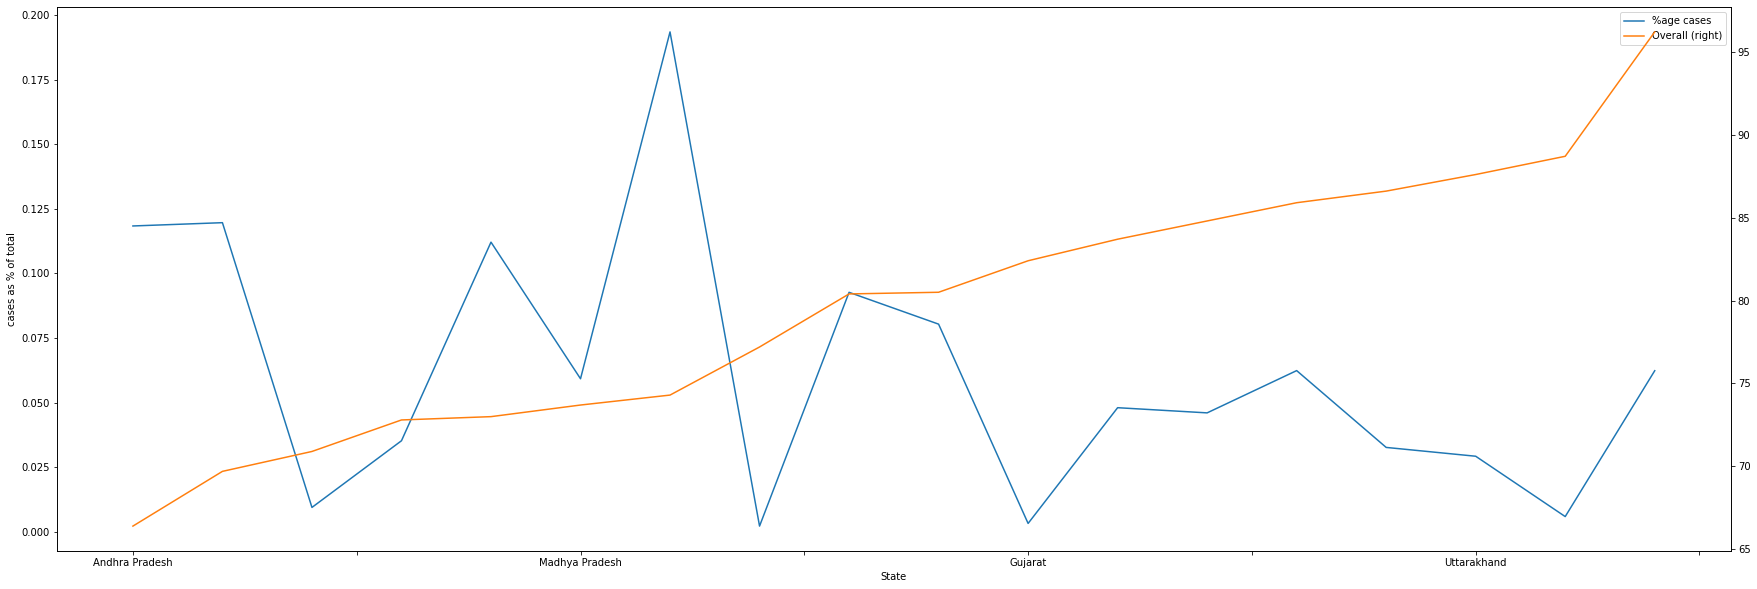

In [13]:
fig, ax = plt.subplots(figsize=(30,10))

req_df.plot(x="State", y="%age cases", ylabel = "cases as % of total", ax=ax)
req_df.plot(x="State",y="Overall",ax=ax, secondary_y=True)

In case of cases that can be classified under child protection, we see a clear trend. The states below the average literacy rate clearly have a larger percentage of cases related to child protection, while the more literate states manage to keep this percentage below 0.05%.

The least literate states of Rajasthan and Andhra Pradesh boast the second and third highest percentage for such cases at 0.119% and 0.118% respectively, with UP a close fourth.

Jharkhand is the state with the clear highest percentage of cases coming under child protection acts, with 0.19%, almost double the next closest state.

From this graph, we can certainly draw the inference that a greater literacy rate is leading to lesser cases under child protection acts

## Cyber Crimes

In [14]:
cyber_cases = pd.read_csv("/kaggle/input/casestypes/cyber_cases-2016-18.csv")
case_counts = cyber_cases.groupby(by="state_code").count()

In [15]:
req_df = pd.merge(lit_rates_survey, case_counts["ddl_case_id"], on="state_code")
req_df = pd.merge(req_df, total_case_counts, on="state_code").sort_values(by="Overall")

req_df["%age cases"] = (req_df["ddl_case_id"] / req_df["Total"])*100
req_df

,State,Male,Female,Overall,state_code,ddl_case_id,Total,%age cases
5,Andhra Pradesh,73.4,59.5,66.4,2,66,900345,0.007331
14,Rajasthan,80.8,57.6,69.7,9,360,2338081,0.015397
4,Bihar,79.7,60.5,70.9,8,29,1480985,0.001958
3,Telangana,80.5,65.1,72.8,29,89,669297,0.013298
16,Uttar Pradesh,81.8,63.4,73.0,13,5535,7018929,0.078858
10,Jharkhand,83.0,64.7,74.3,7,86,581871,0.014780
11,Karnataka,83.4,70.5,77.2,3,2468,3276183,0.075332
8,Haryana,88.0,71.3,80.4,14,217,1807699,0.012004
17,West Bengal,84.8,76.1,80.5,16,36,1271153,0.002832
7,Gujarat,89.5,74.8,82.4,17,76,2270055,0.003348


<AxesSubplot:>

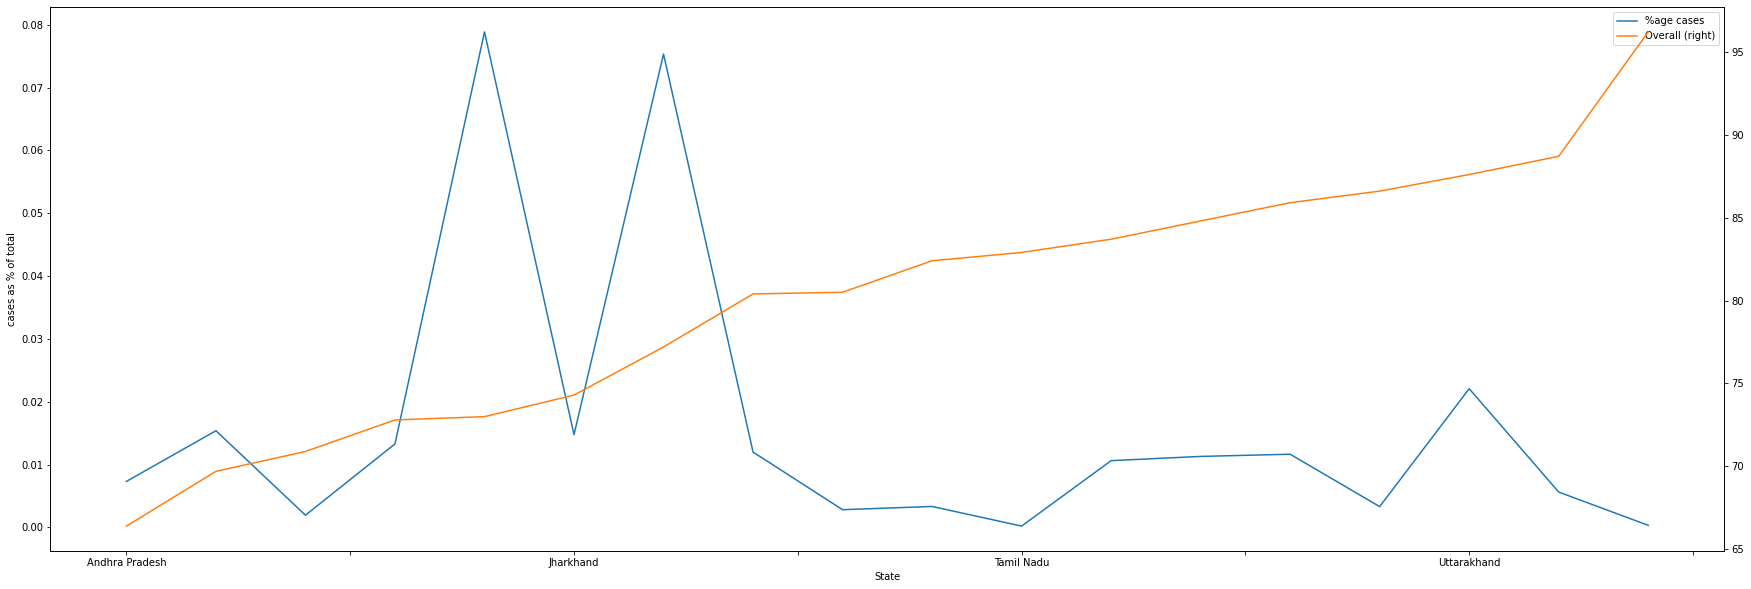

In [16]:
fig, ax = plt.subplots(figsize=(30,10))

req_df.plot(x="State", y="%age cases", ylabel = "cases as % of total", ax=ax)
req_df.plot(x="State",y="Overall",ax=ax, secondary_y=True)

From this graph, we cannot correlate the percentage of cyber crimes in different states, as it is fairly constant apart from two states, with those two being Uttar Pradesh and Karnataka.

However, this is not an anomaly, as these two states are home to the cities of Noida and Bengaluru, which are by far the biggest cities for IT companies and software developement in India. So, in a more IT driven environment, it is natural that more cases will arise.

Thus, we cannot form a concrete conclusion from this graph

## Arms Cases

In [17]:
arms_cases = pd.read_csv("/kaggle/input/casestypes/Archive 2/arms_cases-2016-18.csv")
arms_cases.drop(["Unnamed: 0", "Unnamed: 0.1"], axis="columns", inplace=True)
case_counts = arms_cases.groupby(by="state_code").count()

In [18]:
req_df = pd.merge(lit_rates_survey, case_counts["ddl_case_id"], on="state_code")
req_df = pd.merge(req_df, total_case_counts, on="state_code").sort_values(by="Overall")

req_df["%age cases"] = (req_df["ddl_case_id"] / req_df["Total"])*100
req_df

,State,Male,Female,Overall,state_code,ddl_case_id,Total,%age cases
10,Rajasthan,80.8,57.6,69.7,9,17902,2338081,0.765671
2,Bihar,79.7,60.5,70.9,8,6475,1480985,0.437209
11,Uttar Pradesh,81.8,63.4,73.0,13,106956,7018929,1.523822
6,Jharkhand,83.0,64.7,74.3,7,2898,581871,0.498049
7,Karnataka,83.4,70.5,77.2,3,28,3276183,0.000855
4,Haryana,88.0,71.3,80.4,14,7068,1807699,0.390994
12,West Bengal,84.8,76.1,80.5,16,2571,1271153,0.202257
9,Punjab,88.5,78.5,83.7,22,2170,1579455,0.137389
8,Maharashtra,90.7,78.4,84.8,1,2410,3943403,0.061115
3,Assam,90.1,81.2,85.9,6,889,583211,0.152432


<AxesSubplot:>

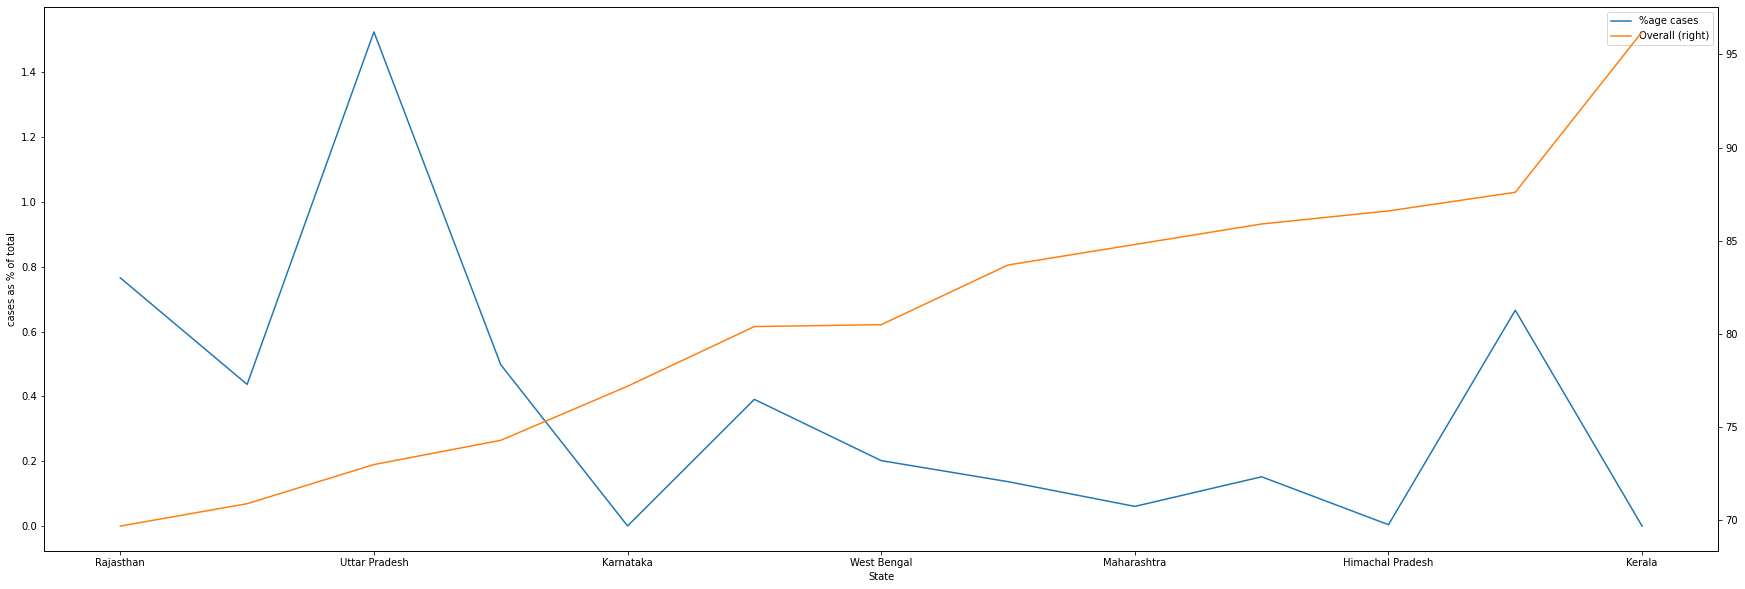

In [19]:
fig, ax = plt.subplots(figsize=(30,10))

req_df.plot(x="State", y="%age cases", ylabel = "cases as % of total", ax=ax)
req_df.plot(x="State",y="Overall",ax=ax, secondary_y=True)

Cases under the Arms Act also show a mostly decreasing trend when compared to literacy rates, with two major anomalies.

While the percentage of cases is high in general amongst the lesser literate states, Uttar Pradesh holds a percent of 1.52% cases under the Arms act, double the amount of the state with the 2nd most percentage cases- Rajasthan with 0.76%. 

As we move upwards along the literacy rate, we see the percentage of cases lessening, apart from Uttrakhand, which creates a break in the trend here with 0.66% of its cases being classed under the Arms Act. In contrast, the states neighbouring Uttrakhand under literacy rates in the given graph have a very low percentage for the same- Himachal Pradesh with 0.004% and Kerala with 0.0004%

We can here correlate the importance of gun safety and illegality of arms with growing literacy rates. We could also say that the state governments in more literate states are more stringent when concerned with Arms.

## IPC Criminal Cases

In [20]:
ipc_cases = pd.read_csv("/kaggle/input/casestypes/Archive 2/ipc_cases_2016-18.csv")
ipc_cases.drop(["Unnamed: 0", "Unnamed: 0.1"], axis="columns", inplace=True)
case_counts = ipc_cases.groupby(by="state_code").count()

In [21]:
req_df = pd.merge(lit_rates_survey, case_counts["ddl_case_id"], on="state_code")
req_df = pd.merge(req_df, total_case_counts, on="state_code").sort_values(by="Overall")

req_df["%age cases"] = (req_df["ddl_case_id"] / req_df["Total"])*100
req_df

,State,Male,Female,Overall,state_code,ddl_case_id,Total,%age cases
5,Andhra Pradesh,73.4,59.5,66.4,2,212058,900345,23.552971
15,Rajasthan,80.8,57.6,69.7,9,556047,2338081,23.782196
4,Bihar,79.7,60.5,70.9,8,943638,1480985,63.716918
3,Telangana,80.5,65.1,72.8,29,244080,669297,36.468115
17,Uttar Pradesh,81.8,63.4,73.0,13,1891957,7018929,26.955067
12,Madhya Pradesh,81.2,65.5,73.7,23,714113,2372692,30.097164
10,Jharkhand,83.0,64.7,74.3,7,302928,581871,52.061024
11,Karnataka,83.4,70.5,77.2,3,450686,3276183,13.756435
8,Haryana,88.0,71.3,80.4,14,270281,1807699,14.951660
18,West Bengal,84.8,76.1,80.5,16,329469,1271153,25.918910


<AxesSubplot:>

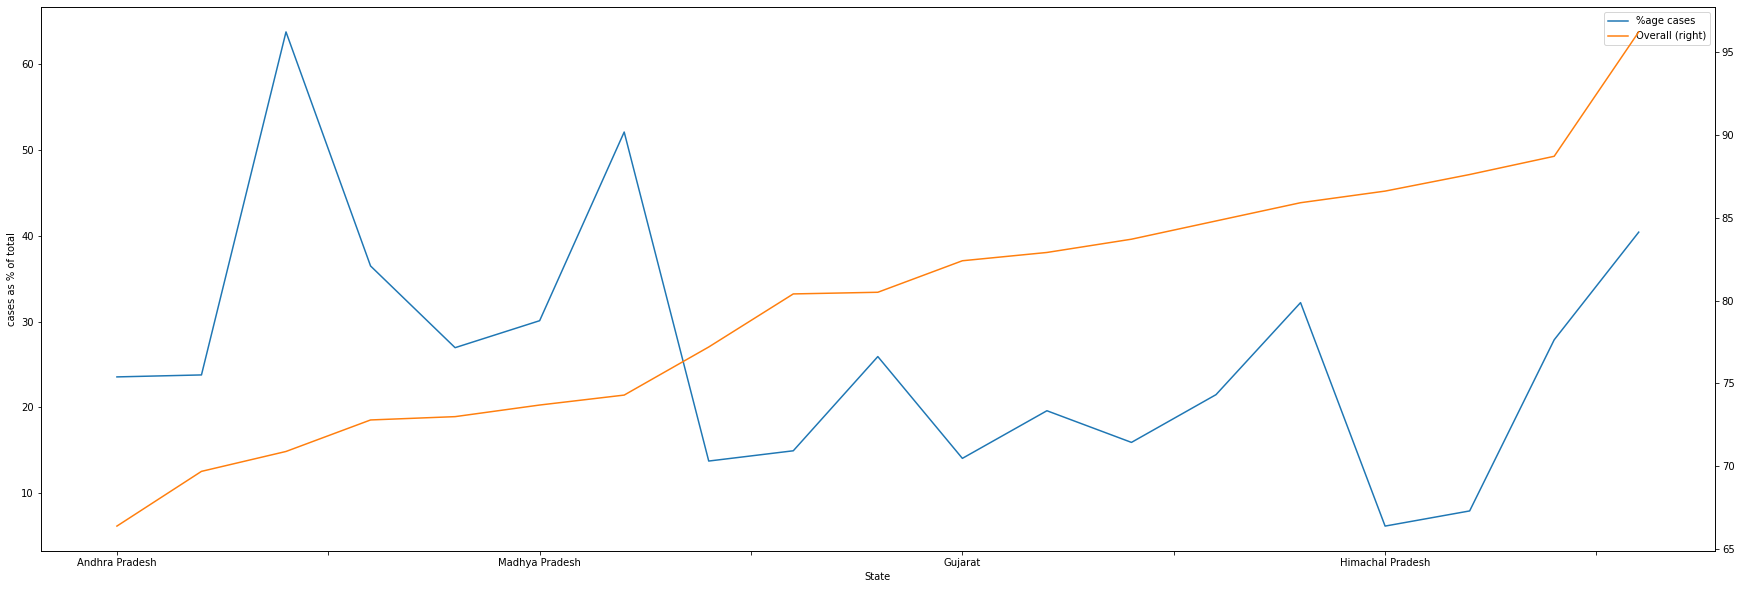

In [22]:
fig, ax = plt.subplots(figsize=(30,10))

req_df.plot(x="State", y="%age cases", ylabel = "cases as % of total", ax=ax)
req_df.plot(x="State",y="Overall",ax=ax, secondary_y=True)

As we can see yet again, even for criminal cases, there is a clear distiction between the lesser literate and the adequately literate states. The seven states below the average literacy rate show an average of 36% of criminal cases, while the above average states enjoy an average of around 19%.

Although most of the literate states keep the percentage of criminal cases below 25%, Assam and Kerala show abnormally high percentages of 32.2% and 40.4% respectively.

The state with the highest percentage of criminal cases is the third least literate state, Bihar with a whopping 63% of cases being classed as criminal cases.

We can infer from this graph at least, that higher literacy rates in general are leading to less criminal cases in courts, except for the anomalies of Assam and Kerala.

# Conclusion

The findings of the analysis can be summarised as follows:
- The percentage of Domestic Violence cases in courts rose steadily with the literacy rate, which prompts the question whether lesser literacy leads to less reportings of domestic violence, or is it realy true that the more literate states are less safer for women?
- In cases under child protection acts, the literate states performed better overall with less percentage of cases coming thier way.
- The percenage of Cyber crime cases did not have any correlation with the literacy rates
- Under the arms act, we saw a clear trend of the percentage of cases being inversely proportional to the literacy rate.
- For criminal cases under IPC, again the lesser literate states had a much higher percentage of criminal cases. This percentage decreased as we went up literacy rates, but right at the end increased again with Assam, Kerala and Delhi having high percentages. But regardless, the more literate states performed better.

> In general, we can conclude that although literacy rate is not a primary fctor in detecting crime rates, the data certainly shows, even if not strongly, that higher literacy rates are on average leading to lesser crimes overall